<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_98/blob/main/Reto_DS_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://static.wikia.nocookie.net/tecdemonterrey/images/1/1b/Logo_Tec_azul.png/revision/latest?cb=20190219041656&path-prefix=es" width="230" />

## **Actividad Semanal 8- Reto**


----

**Datos generales**
---
**Alumna:**

| Nombre | Matrícula del estudiante
|---|---|
| Andrés Felipe Velasco Muñoz | **A01676755** |
| Helmy Andrea Moreno Navarro | **A01793918** |


>**Materia:** Ciencia y Análistica de Datos (Gpo 10)

>**Profesora Titular:** María de la Paz Rico


16 de noviembre 2022

#**Introducción**

El agua subterránea resulta de la infiltración profunda a través de poros o grietas de sedimentos y rocas de agua proveniente de la precipitación o fuentes superficiales intercontectadas. Así, el agua se almacena en acuíferos que se constituyen en embalses naturales que puede ser aprovechados por el hombre para satisfacer diversas necesidades mediante diferentes tipos de capataciones como aljibes, pozos profundos, adecuación de manantiales; o también puede retornar  de forma natural hacia sistemas acuáticos y terrestres interdependientes, cumpliendo una importante función reguladora de las corrientes hídricas o prestando diversos servicios ecosistémicos (Figura 1).

Las aguas subterráneas representan la mayor reserva de agua dulce de las regiones habitadas por seres humanos, con un 95% del total de aguas disponibles de todos los continentes y territorios insulares.

De la matriz hídrica se tiene que el 97,5% corresponde a los océanos, del 2,5% restante, el 70% no se encuentra disponible para consumo humano debido a que está en forma de glaciares, nieve o hielo, el 0,3% se encuentra en lagos, ríos y humedales y el 29,7% corresponde a agua subterránea (Ministerio de Ambiente y Desarrollo Sostenible Colombia).




Figura 1 (Formación y distribución de aguas subterráneas)

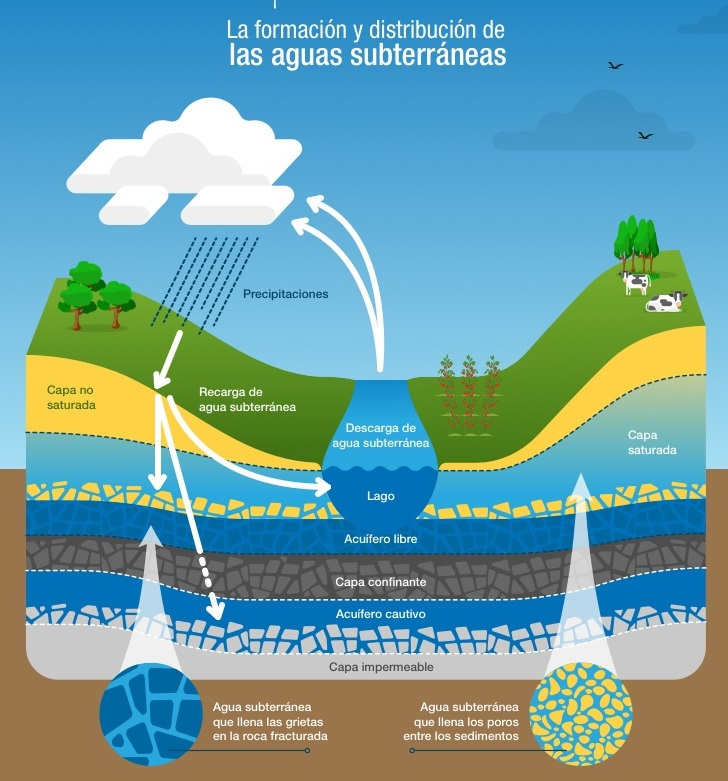

# **Objetivos**
Para garantizar una adecuada evaluación y gestión del agua subterránea es importante partir de una caracterización fisicoquímica y microbiológica de cada pozo y acuífero que permita identificar la calidad del agua de cada uno de estos y de esta manera en primera instancia proponer tratamientos direccionados a cada necesidad y así definir el uso que se le puede dar a cada agua específica, con la finalidad de prevenir problemas de salud pública ocasionados por consumo de agua contaminada.

Además, con la información recopilada es posible diseñar, promover e implementar estrategias para la ampliación y consolidación del conocimiento hidrogeológico de sistemas acuíferos entre las comunidades. También permite implementar estrategias de fortalecimiento institucional para la adecuada gestión del recurso hídrico subterráneo y asignación de recursos económicos para financiación de proyectos de evaluación, protección y conservación.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests, zipfile
from io import BytesIO

from sklearn import tree
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold, KFold, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, Normalizer, StandardScaler
from sklearn.metrics import recall_score, confusion_matrix, classification_report, make_scorer


#**Limpieza de datos**

#Importar datos

In [52]:
sub = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(sub)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')

df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [53]:
print(df["SEMAFORO"].value_counts())

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64


In [54]:
sem_map = pd.DataFrame(df['SEMAFORO'])
sem_map


,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


In [55]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [56]:
df.shape

(1068, 57)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [58]:
df_subte = pd.DataFrame(df)
df_subte['SEMAFORO'] = df_subte['SEMAFORO'].astype('category')
df_subte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CLAVE                 1068 non-null   object  
 1   SITIO                 1068 non-null   object  
 2   ORGANISMO_DE_CUENCA   1068 non-null   object  
 3   ESTADO                1068 non-null   object  
 4   MUNICIPIO             1068 non-null   object  
 5   ACUIFERO              1068 non-null   object  
 6   SUBTIPO               1068 non-null   object  
 7   LONGITUD              1068 non-null   float64 
 8   LATITUD               1068 non-null   float64 
 9   PERIODO               1068 non-null   int64   
 10  ALC_mg/L              1064 non-null   float64 
 11  CALIDAD_ALC           1064 non-null   object  
 12  CONDUCT_mS/cm         1062 non-null   float64 
 13  CALIDAD_CONDUC        1062 non-null   object  
 14  SDT_mg/L              0 non-null      float64 
 15  SDT_

In [59]:
df_subte.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [60]:
categoricas_sub = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'PERIODO', 'ACUIFERO',	'SUBTIPO',	'CALIDAD_ALC', 'CALIDAD_CONDUC',	'SDT_mg/L',	'CALIDAD_SDT_ra',	'CALIDAD_SDT_salin',	'CALIDAD_FLUO',	'CALIDAD_DUR',	'CALIDAD_COLI_FEC',	'CALIDAD_N_NO3',	'CALIDAD_AS',	'CALIDAD_CD',	'CALIDAD_CR',
                  'CALIDAD_HG',	'CALIDAD_PB',	'CALIDAD_MN',	'CALIDAD_FE',	'CONTAMINANTES',	'CUMPLE_CON_ALC',	'CUMPLE_CON_COND',	'CUMPLE_CON_SDT_ra',	'CUMPLE_CON_SDT_salin',	'CUMPLE_CON_FLUO',	'CUMPLE_CON_DUR',	'CUMPLE_CON_CF',	'CUMPLE_CON_NO3',	'CUMPLE_CON_AS',
                  'CUMPLE_CON_CD',	'CUMPLE_CON_CR',	'CUMPLE_CON_HG',	'CUMPLE_CON_PB',	'CUMPLE_CON_MN',	'CUMPLE_CON_FE', 'CONDUCT_mS/cm',]

In [61]:
numericas = ['LONGITUD', 'LATITUD', 'ALC_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO']

In [62]:
df_sub = df_subte[['LONGITUD', 'LATITUD', 'ALC_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO']]
df_sub

,LONGITUD,LATITUD,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,229.990,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891,Verde
1,-102.20075,21.99958,231.990,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
2,-102.28801,22.36685,204.920,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
3,-102.29449,22.18435,327.000,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
4,-110.24480,23.45138,309.885,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,231.045,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
1064,-99.70099,24.78280,256.000,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578,Rojo
1065,-99.82249,25.55197,330.690,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129,Rojo
1066,-100.32683,24.80118,193.140,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786,Verde


In [63]:
df_sub.columns

Index(['LONGITUD', 'LATITUD', 'ALC_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L',
       'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L',
       'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L',
       'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO'],
      dtype='object')

In [64]:
df_sub.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD               -86.86412
LATITUD                32.677713
ALC_mg/L                  1650.0
FLUORUROS_mg/L              <0.2
COLI_FEC_NMP/100_mL         <1.1
AS_TOT_mg/L                <0.01
CD_TOT_mg/L               <0.003
CR_TOT_mg/L               <0.005
HG_TOT_mg/L              <0.0005
PB_TOT_mg/L               <0.005
MN_TOT_mg/L              <0.0015
FE_TOT_mg/L               <0.025
dtype: object

#**Limpieza**
Datos nulos

In [65]:
df_sub

,LONGITUD,LATITUD,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,229.990,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891,Verde
1,-102.20075,21.99958,231.990,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
2,-102.28801,22.36685,204.920,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
3,-102.29449,22.18435,327.000,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
4,-110.24480,23.45138,309.885,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,231.045,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
1064,-99.70099,24.78280,256.000,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578,Rojo
1065,-99.82249,25.55197,330.690,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129,Rojo
1066,-100.32683,24.80118,193.140,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786,Verde


In [66]:
#Aplicación de Label Encoder

enc_sem = preprocessing.LabelEncoder()   
   
df_sub[ 'SEMAFORO' ]= enc_sem.fit_transform(df_sub[ 'SEMAFORO' ])   
print(df_sub[ 'SEMAFORO' ].unique())  
print("Data Frame after Label Encoding:\n")  
print( df_sub ) 


enc_sem = preprocessing.LabelEncoder()
enc_sem.fit_transform(df_sub[['SEMAFORO']])
enc_sem

[2 1 0]
Data Frame after Label Encoding:

       LONGITUD   LATITUD  ALC_mg/L SDT_M_mg/L FLUORUROS_mg/L  DUR_mg/L  \
0    -102.02210  22.20887   229.990      603.6         0.9766   213.732   
1    -102.20075  21.99958   231.990      445.4         0.9298  185.0514   
2    -102.28801  22.36685   204.920        342         1.8045   120.719   
3    -102.29449  22.18435   327.000      478.6         1.1229   199.879   
4    -110.24480  23.45138   309.885       1179         0.2343  476.9872   
...         ...       ...       ...        ...            ...       ...   
1063  -99.54191  24.76036   231.045     1545.8           <0.2   752.096   
1064  -99.70099  24.78280   256.000        297           <0.2       273   
1065  -99.82249  25.55197   330.690       1873         0.7574  660.2126   
1066 -100.32683  24.80118   193.140   690.6667         0.7108   406.368   
1067 -100.73302  25.09380   263.070        495         0.4002   362.544   

     COLI_FEC_NMP/100_mL N_NO3_mg/L AS_TOT_mg/L CD_TOT_mg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [67]:
for i in numericas:
  print(" nombre de la columna -------------------------" + i)

 nombre de la columna -------------------------LONGITUD
 nombre de la columna -------------------------LATITUD
 nombre de la columna -------------------------ALC_mg/L
 nombre de la columna -------------------------SDT_M_mg/L
 nombre de la columna -------------------------FLUORUROS_mg/L
 nombre de la columna -------------------------DUR_mg/L
 nombre de la columna -------------------------COLI_FEC_NMP/100_mL
 nombre de la columna -------------------------N_NO3_mg/L
 nombre de la columna -------------------------AS_TOT_mg/L
 nombre de la columna -------------------------CD_TOT_mg/L
 nombre de la columna -------------------------CR_TOT_mg/L
 nombre de la columna -------------------------HG_TOT_mg/L
 nombre de la columna -------------------------PB_TOT_mg/L
 nombre de la columna -------------------------MN_TOT_mg/L
 nombre de la columna -------------------------FE_TOT_mg/L
 nombre de la columna -------------------------SEMAFORO


In [68]:
#Revisando cada columna
print(df_sub['COLI_FEC_NMP/100_mL'].unique())
print(df_sub['COLI_FEC_NMP/100_mL'].value_counts())

['<1.1' '291' '6131' '110' '798' '146' '3873' '355' '10' '857' '4106'
 '265' '521' '3654' '240' '43' '93' '9' '4' '1019' '4352' '63' '350'
 '5794' '313' '86' '1421' '14136' '40' '309' '201' '97' '52' '697' '2613'
 '759' '31' '19863' '24196' '121' '41' '20' '160' '122' '243' '1483' '448'
 '7270' '530' '2247' '1291' '246' '175' '2359' '1607' '2755' '120' '8161'
 '21' '131' '211' '75' '1162' '249' '169' '331' '880' '210' '23' '1720'
 '218' '557' '11199' '189' '7' '135' '90' '70' '3' '11' '460' '1098' '230'
 '430' '1126' '10462' '9208' '3076' '292' '95' '684' '2481' '670' '145'
 '417' '161' '74' '1872' '275' '2400' '4600' '11000' '200' '109' '1100'
 '2046' '17329' '389' '1017' '241' '1722' '908' '432' '108' '1464' '231'
 '620' '1529' '148' '73' '171' '345' '134' '374' '1658']
<1.1    737
10       37
40       28
20       19
31       13
       ... 
1607      1
175       1
2247      1
530       1
1658      1
Name: COLI_FEC_NMP/100_mL, Length: 125, dtype: int64


In [69]:
print(" sumatoria por valores uncos--------------------") 
print(df_sub[i].value_counts())

 sumatoria por valores uncos--------------------
2    434
1    387
0    247
Name: SEMAFORO, dtype: int64


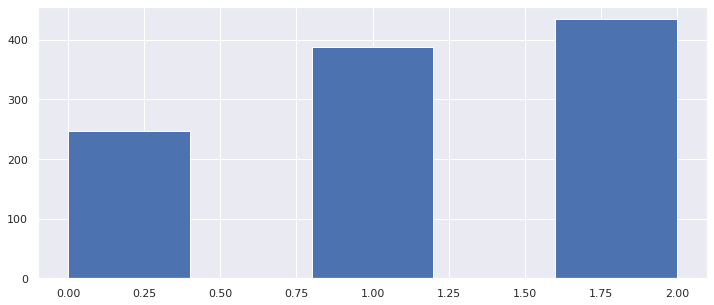

In [70]:
semaforo = df_sub['SEMAFORO']
semaforo
semaforo.hist(bins = 5, figsize=(12, 5))

In [71]:
numericas = ['LONGITUD', 'LATITUD', 'ALC_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO']

for name in numericas:

  df_sub[name] = df_sub[name].astype('str') 
  df_sub[name] = df_sub[name].str.replace('<25','25') 
  df_sub[name] = df_sub[name].str.replace('<0.2','0.2') 
  df_sub[name] = df_sub[name].str.replace('<20','20') 
  df_sub[name] = df_sub[name].str.replace('<1.1','1.1')
  df_sub[name] = df_sub[name].str.replace('<0.02','0.02') 
  df_sub[name] = df_sub[name].str.replace('<0.01','0.01') 
  df_sub[name] = df_sub[name].str.replace('<0.003','0.003')
  df_sub[name] = df_sub[name].str.replace('<0.005','0.005') 
  df_sub[name] = df_sub[name].str.replace('<0.0005','0.0005') 
  df_sub[name] = df_sub[name].str.replace('<0.0015','0.0015') 
  df_sub[name] = df_sub[name].str.replace('<0.025','0.025')
  df_sub[name]= df_sub[name].astype('float')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A va

In [72]:
  df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LONGITUD             1068 non-null   float64
 1   LATITUD              1068 non-null   float64
 2   ALC_mg/L             1064 non-null   float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
 15  SEMAFORO             1068 non-null   f

In [73]:
datos_sc = preprocessing.StandardScaler().fit_transform(df_sub)
datos_sc

array([[-0.01956574, -0.24569861, -0.04831185, ..., -0.1886027 ,
        -0.05804251,  1.05880628],
       [-0.04622943, -0.29955813, -0.0311914 , ..., -0.1886027 ,
        -0.06962256,  1.05880628],
       [-0.05925307, -0.20504341, -0.2629167 , ..., -0.1886027 ,
        -0.06962256, -0.22474095],
       ...,
       [ 0.3087282 ,  0.61462801,  0.81370283, ..., -0.12828428,
        -0.03567729, -0.22474095],
       [ 0.23345496,  0.42141673, -0.36375615, ..., -0.16070211,
        -0.04187379,  1.05880628],
       [ 0.17283071,  0.49672073,  0.2348604 , ..., -0.1886027 ,
        -0.06962256,  1.05880628]])

In [74]:
datos_minmax = preprocessing.MinMaxScaler().fit_transform(df_sub)
datos_minmax

array([[4.91345172e-01, 4.22139674e-01, 1.25264883e-01, ...,
        0.00000000e+00, 3.58922672e-04, 1.00000000e+00],
       [4.85350232e-01, 4.10587262e-01, 1.26496895e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.82422057e-01, 4.30859871e-01, 1.09821605e-01, ...,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01],
       ...,
       [5.65157266e-01, 6.06672469e-01, 1.87296718e-01, ...,
        2.52769890e-03, 1.05213058e-03, 5.00000000e-01],
       [5.48233179e-01, 5.65230281e-01, 1.02565050e-01, ...,
        1.16919993e-03, 8.60070553e-04, 1.00000000e+00],
       [5.34602701e-01, 5.81382352e-01, 1.45642371e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [75]:
  df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LONGITUD             1068 non-null   float64
 1   LATITUD              1068 non-null   float64
 2   ALC_mg/L             1064 non-null   float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
 15  SEMAFORO             1068 non-null   f

In [76]:
for i in numericas:
  print(" nombre de la columna -------------------------" + i)
  
  #print("Valores unicos", df[i].unique())
  print(" sumatoria por valores uncos--------------------") 
  print(df_sub[i].value_counts())

 nombre de la columna -------------------------LONGITUD
 sumatoria por valores uncos--------------------
-98.350389     2
-102.174880    2
-102.022100    1
-92.159140     1
-93.197940     1
              ..
-99.331475     1
-99.349736     1
-99.383056     1
-99.349550     1
-100.733020    1
Name: LONGITUD, Length: 1066, dtype: int64
 nombre de la columna -------------------------LATITUD
 sumatoria por valores uncos--------------------
19.234778    2
22.208870    1
14.839550    1
17.736590    1
17.947400    1
            ..
20.085211    1
20.124508    1
20.132500    1
20.153822    1
25.093800    1
Name: LATITUD, Length: 1067, dtype: int64
 nombre de la columna -------------------------ALC_mg/L
 sumatoria por valores uncos--------------------
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
 nombre de la columna -------------------------SDT_M_mg/L
 sumat

#**Análisis**
Describe(), mean()

Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo.

In [77]:
df_sub

,LONGITUD,LATITUD,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,229.990,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910,2.0
1,-102.20075,21.99958,231.990,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500,2.0
2,-102.28801,22.36685,204.920,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500,1.0
3,-102.29449,22.18435,327.000,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500,2.0
4,-110.24480,23.45138,309.885,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,231.045,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,1.0
1064,-99.70099,24.78280,256.000,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578,1.0
1065,-99.82249,25.55197,330.690,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290,1.0
1066,-100.32683,24.80118,193.140,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860,2.0


#**Visualización**

- Plot, boxplot de pandas
  - Identificar medidas de dispersión, máximo, mínimo.
  - Identificar medidas de posición no centrales , los cuartiles , outliers.  

In [78]:
df_sub.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.174180,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.617190,25.510285,32.677713
ALC_mg/L,1064.0,235.633759,116.874291,26.64000,164.000000,215.527500,292.710000,1650.000000
SDT_M_mg/L,1066.0,896.101567,2751.530590,25.00000,337.500000,550.400000,916.100000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.20000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1067.0,347.938073,359.669452,20.00000,121.194800,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.10000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1067.0,4.319759,8.345134,0.02000,0.650294,2.080932,5.201698,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.01000,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.00300,0.003000,0.003000,0.003000,0.032110


##**Identificar correlaciones.**

In [79]:
df_sub.corr()

,LONGITUD,LATITUD,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
LONGITUD,1.000000,-0.760204,0.167234,-0.013927,-0.122633,0.088181,-0.084443,-0.107540,-0.077090,0.043595,0.058944,0.041102,-0.004493,-0.036141,0.021927,-0.118235
LATITUD,-0.760204,1.000000,-0.080026,0.059878,0.131382,0.085243,0.063130,0.148238,0.090597,-0.053099,-0.058650,-0.102419,-0.045438,-0.036289,-0.041591,-0.010409
ALC_mg/L,0.167234,-0.080026,1.000000,0.079350,0.069056,0.243177,-0.016449,-0.000394,0.073299,0.032686,-0.014282,0.067195,0.015064,0.129866,0.043423,-0.272414
SDT_M_mg/L,-0.013927,0.059878,0.079350,1.000000,-0.013798,0.347205,-0.001133,0.101706,-0.010157,0.010800,-0.000682,0.015114,-0.005552,0.018927,0.020104,-0.165953
FLUORUROS_mg/L,-0.122633,0.131382,0.069056,-0.013798,1.000000,-0.149691,0.003564,-0.019782,0.444079,-0.015123,-0.005242,-0.026358,-0.032236,-0.049742,-0.009994,-0.062859
DUR_mg/L,0.088181,0.085243,0.243177,0.347205,-0.149691,1.000000,0.031727,0.301468,-0.106498,0.025002,0.007438,0.064839,-0.018908,0.083822,0.059775,-0.403367
COLI_FEC_NMP/100_mL,-0.084443,0.063130,-0.016449,-0.001133,0.003564,0.031727,1.000000,-0.000969,0.038151,-0.001656,-0.008840,-0.007661,0.022510,-0.005326,0.003045,-0.036977
N_NO3_mg/L,-0.107540,0.148238,-0.000394,0.101706,-0.019782,0.301468,-0.000969,1.000000,-0.008019,-0.009362,-0.015131,0.014912,-0.016529,-0.036854,0.013298,-0.046095
AS_TOT_mg/L,-0.077090,0.090597,0.073299,-0.010157,0.444079,-0.106498,0.038151,-0.008019,1.000000,-0.009078,-0.009582,-0.009939,-0.023057,0.016916,0.014295,-0.057347
CD_TOT_mg/L,0.043595,-0.053099,0.032686,0.010800,-0.015123,0.025002,-0.001656,-0.009362,-0.009078,1.000000,-0.001781,-0.004083,-0.002875,-0.004205,-0.001036,-0.007466


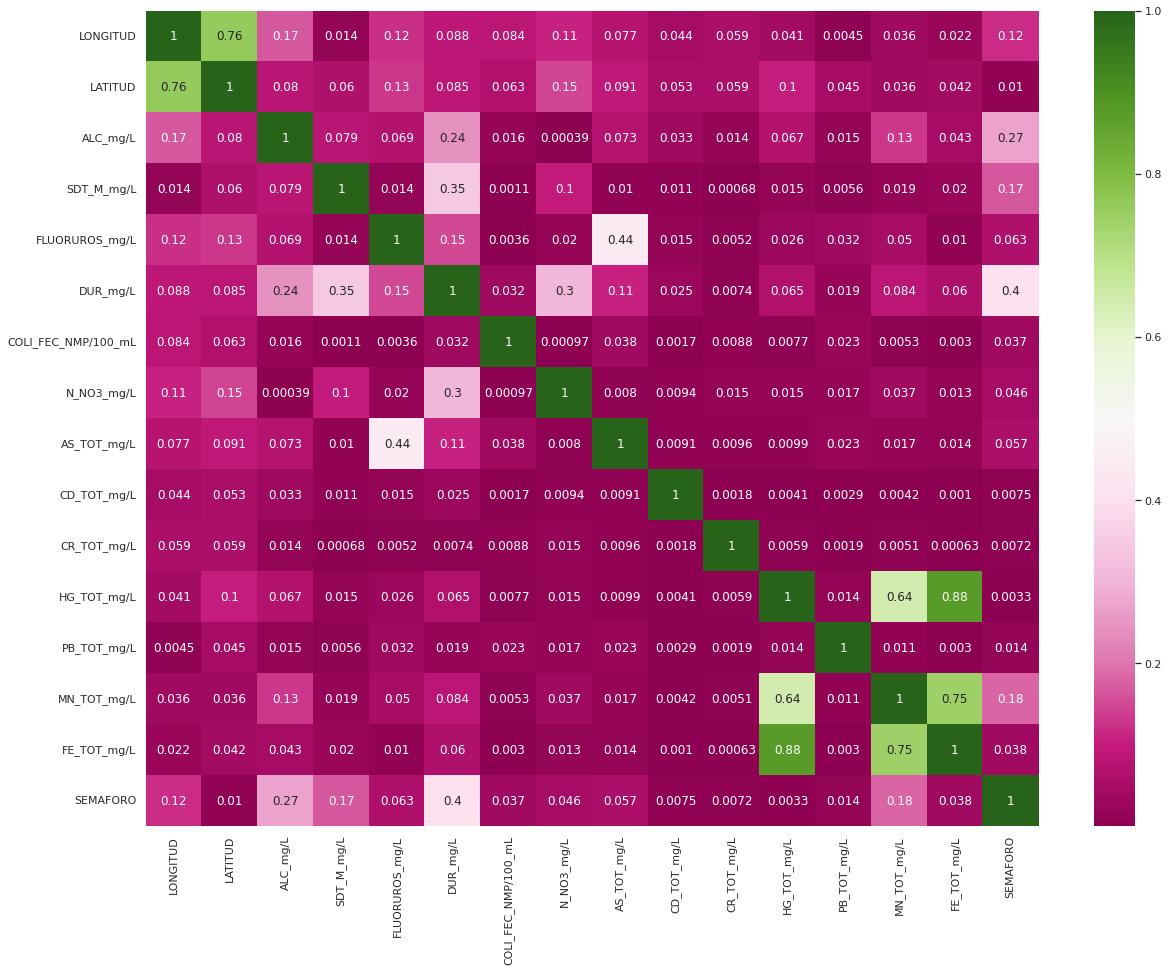

In [80]:
correlacion = df_sub.corr().abs()
f, ax = plt.subplots(figsize = (20,15)) 
ax = sns.heatmap(correlacion, cmap = "PiYG", annot = True)

##**Partición de DataSet**

In [81]:
random_state_v=3

In [82]:
df_sub

,LONGITUD,LATITUD,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,229.990,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910,2.0
1,-102.20075,21.99958,231.990,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500,2.0
2,-102.28801,22.36685,204.920,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500,1.0
3,-102.29449,22.18435,327.000,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500,2.0
4,-110.24480,23.45138,309.885,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,231.045,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,1.0
1064,-99.70099,24.78280,256.000,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578,1.0
1065,-99.82249,25.55197,330.690,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290,1.0
1066,-100.32683,24.80118,193.140,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860,2.0


In [83]:
X = df_sub.iloc[0:, 0:15]
y = df_sub.iloc[:, -1]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state=random_state_v)
X_train.head()

,LONGITUD,LATITUD,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
101,-108.003370,31.05437,89.790,372.8000,1.4242,154.3776,1.1,8.146419,0.0100,0.003,0.0055,0.0005,0.005,0.0015,0.0520
239,-104.481510,24.77588,388.725,467.6667,2.2075,172.1904,1.1,0.820841,0.0100,0.003,0.0050,0.0005,0.005,0.0015,0.0253
39,-110.319630,24.04636,138.750,1780.0000,0.2000,616.7140,1.1,7.406388,0.0100,0.003,0.0050,0.0005,0.005,0.0020,0.0863
928,-107.596610,24.76621,281.940,485.2000,0.2815,263.2336,20.0,3.534655,0.0149,0.003,0.0050,0.0005,0.005,1.7710,0.0300
175,-104.071944,18.99925,160.230,NaN,0.2626,376.9980,21.0,16.531688,0.0100,0.003,0.0050,0.0005,0.005,0.0025,0.0426


In [85]:
X_train.shape

(854, 15)

In [86]:
y_train.shape

(854,)

In [87]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LONGITUD,854.0,-101.799701,6.623329,-116.66425,-105.030655,-102.118850,-98.967989,-86.864120
LATITUD,854.0,23.090573,3.847735,14.56115,20.224857,22.568245,25.486110,32.677713
ALC_mg/L,852.0,235.560898,120.917579,26.64000,162.881250,215.825000,288.942500,1650.000000
SDT_M_mg/L,852.0,913.432242,3045.415374,104.00000,335.150000,552.400000,917.000000,82170.000000
FLUORUROS_mg/L,854.0,1.090575,2.043394,0.20000,0.266050,0.494450,1.138575,34.803300
DUR_mg/L,853.0,346.216541,352.516417,20.00000,120.719000,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,854.0,376.554333,2153.700556,1.10000,1.100000,1.100000,10.000000,24196.000000
N_NO3_mg/L,853.0,4.139943,7.537934,0.02000,0.637862,1.956456,5.022000,102.299497
AS_TOT_mg/L,854.0,0.020221,0.037588,0.01000,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,854.0,0.003037,0.001000,0.00300,0.003000,0.003000,0.003000,0.032110


Imputación de la variable numérica

In [88]:
pipeline_cuantitativa = Pipeline(steps = [('impMean', SimpleImputer(strategy='median'))])
cuantitativa_transformada =  ColumnTransformer(transformers = [('cuantitativa', pipeline_cuantitativa, numericas)])

In [89]:
imputacion_transformer = ColumnTransformer(transformers = [
    ('cuantitativa', pipeline_cuantitativa, numericas)
    ],remainder='passthrough')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


ValueError: ignored

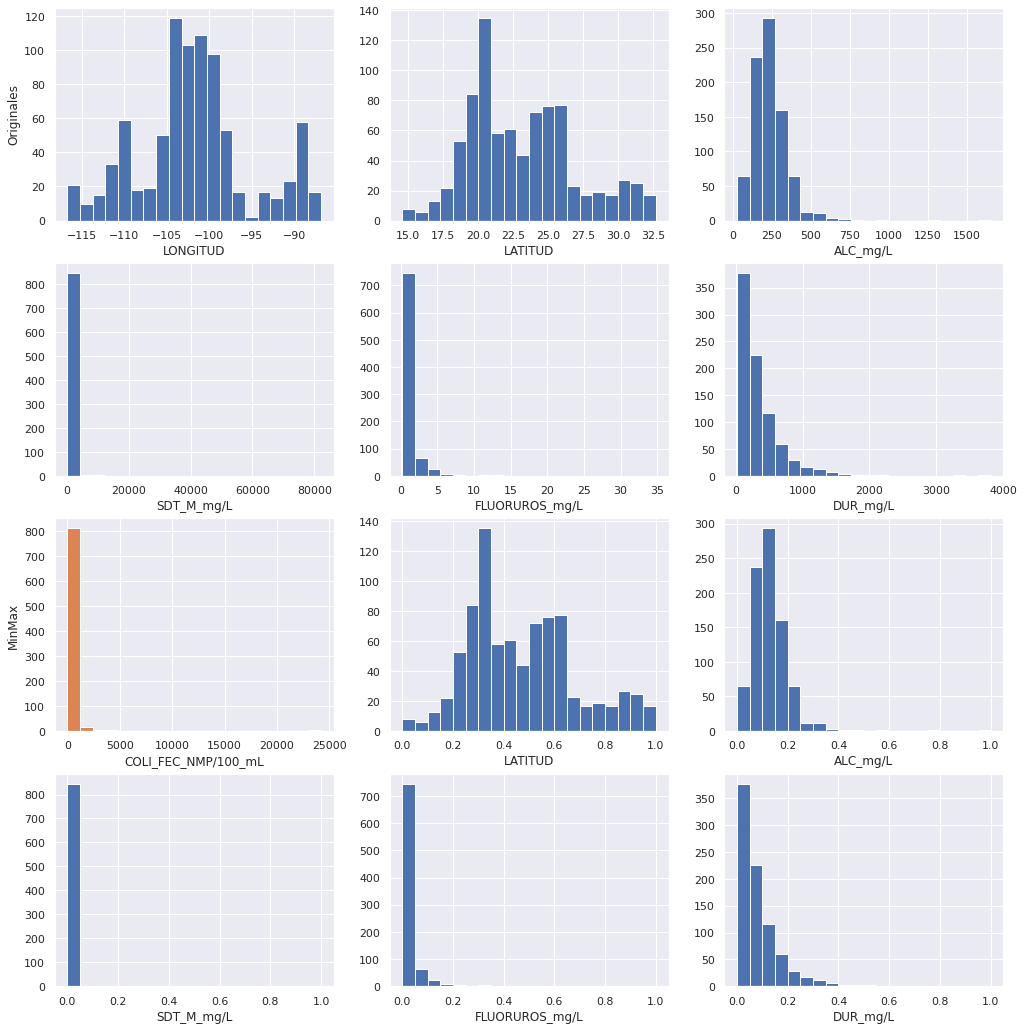

In [90]:
total_cuantitativas = len(numericas)
sns.set(rc={'figure.figsize':(17,18)})
fig, axes = plt.subplots(4, total_cuantitativas)    

for i in range(0,total_cuantitativas):


  # Datos originales ---------------------------------------------------------
  plt.subplot(4,3,i+1) 
  Transf0 = X_train[numericas[i]]
  plt.hist(Transf0,bins=20)
  plt.xlabel(numericas[i])
  if i==0:
    plt.ylabel('Originales')



  # Datos transformados con MinMax ---------------------------------
  plt.subplot(4,3,i+7)
  minmax = MinMaxScaler()
  minmax.fit(X_train[numericas[i]].to_numpy().reshape(-1, 1))
  tranf_2 = minmax.transform(X_train[numericas[i]].to_numpy().reshape(-1, 1))
  plt.hist(tranf_2,bins=20) 
  plt.xlabel(numericas[i])
  if i==0:
    plt.ylabel('MinMax')

In [92]:
pipeline_logaritmico = Pipeline(steps =[('log', FunctionTransformer(np.log))])

In [100]:
#Transformada final
names = X_train.columns.to_list()
new_names = numericas + [name for name in names if name not in numericas]

In [101]:
transformada = ColumnTransformer(transformers = [
    ('logqua', pipeline_logaritmico, numericas),
    ],remainder='passthrough')
# xs = transformada.fit_transform(X_train)
# X_train_C = pd.DataFrame(xs, columns=new_names)
# X_train_C

Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [102]:
#Realiza un análisis general de las features importances a traves de decision trees o random forest.
def get_models():
  modelos = list()
  nombres = list()

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  # RF - Bosque Aleatorio
  modelos.append(RandomForestClassifier(max_depth=5, random_state=random_state_v))
  nombres.append('RF')

  return modelos, nombres

In [96]:
def mi_precision(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  precision =vp/(vp + fp)
  return precision

def mi_recall(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  recall =vp / (vp + fn)
  return recall

In [97]:
modelos, nombres = get_models()

In [98]:
def validacion_scores(X,y):
  scores = ["precision", "recall"]
  resultados = list()
  
  for nombre,modelo in zip(nombres,modelos):
    KFold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=random_state_v)
    mi_pipeline = Pipeline(steps=[('logqua', transformada),('m', modelo)])
    mismetricas ={
                  "precision": make_scorer(mi_precision),
                  "recall": make_scorer(mi_recall)
                  }
    score = cross_validate(estimator=mi_pipeline, X=X, y=y, cv=KFold, scoring=mismetricas)
    resultados.append({'nombre':nombre,'score':score})
  return resultados

In [99]:
def imprimir_resultados(resultados):
  for resultado in resultados:
      nombre = resultado['nombre']
      score = resultado['score']

print('Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)' % (nombre, np.mean(score['test_precision']),
                                                                            np.std(score['test_precision']), 
                                                                            np.mean(score['test_recall']),
                                                                            np.std(score['test_recall'])
                                                                            ))
                                                                          

NameError: ignored

#**BIBLIOGRAFÍA**

Actualizado: 15-Marzo-2019. Disponibilidad de agua subterránea en México. https://paratodomexico.com/geografia-de-mexico/hidrografia-de-mexico/acuiferos-de-mexico.html